<a href="https://colab.research.google.com/github/Radomir21/Data-Analysis-2024/blob/main/Lab_2_Besh_Radomyr_Basic_Unsupervised_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Імпорт датасету я вирішив зробити через токен на kaggle. Таким чином в майбутньому треба буде просто змінювати силку на датасет, знайдений на kaggle.

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"radomyrbesh","key":"3d9f9b3b5d9a12cdad820b6955786f8a"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi
api = KaggleApi()
api.authenticate()
api.dataset_download_files('jsphyg/weather-dataset-rattle-package', 'Rain in Australia')


Dataset URL: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package


In [4]:
import zipfile
path_to_zip_file = 'Rain in Australia/weather-dataset-rattle-package.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as z:
    z.extractall('Rain in Australia')

In [189]:
#бібліотеки
import pandas as pd
import numpy as np
import math
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from PIL import Image
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time
import imageio
import string
import nltk
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression

# **1) Підготовка датасету для аналізу**

In [37]:
df = pd.read_csv("/content/Rain in Australia/weatherAUS.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [39]:
df.head(10)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
5,2008-12-06,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,...,55.0,23.0,1009.2,1005.4,NaN,NaN,20.6,28.9,No,No
6,2008-12-07,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,...,49.0,19.0,1009.6,1008.2,1.0,NaN,18.1,24.6,No,No
7,2008-12-08,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,...,48.0,19.0,1013.4,1010.1,NaN,NaN,16.3,25.5,No,No
8,2008-12-09,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,...,42.0,9.0,1008.9,1003.6,NaN,NaN,18.3,30.2,No,Yes
9,2008-12-10,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,...,58.0,27.0,1007.0,1005.7,NaN,NaN,20.1,28.2,Yes,No


In [40]:
df.isnull().sum()

,0
Date,0
Location,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustDir,10326
WindGustSpeed,10263
WindDir9am,10566


In [41]:
unique_values = df.apply(lambda x: x.unique())
unique_values

,0
Date,"[2008-12-01, 2008-12-02, 2008-12-03, 2008-12-0..."
Location,"[Albury, BadgerysCreek, Cobar, CoffsHarbour, M..."
MinTemp,"[13.4, 7.4, 12.9, 9.2, 17.5, 14.6, 14.3, 7.7, ..."
MaxTemp,"[22.9, 25.1, 25.7, 28.0, 32.3, 29.7, 25.0, 26...."
Rainfall,"[0.6, 0.0, 1.0, 0.2, 1.4, 2.2, 15.6, 3.6, nan,..."
Evaporation,"[nan, 12.0, 14.8, 12.6, 10.8, 11.4, 11.2, 13.0..."
Sunshine,"[nan, 12.3, 13.0, 13.3, 10.6, 12.2, 8.4, 0.0, ..."
WindGustDir,"[W, WNW, WSW, NE, NNW, N, NNE, SW, nan, ENE, S..."
WindGustSpeed,"[44.0, 46.0, 24.0, 41.0, 56.0, 50.0, 35.0, 80...."
WindDir9am,"[W, NNW, SE, ENE, SW, SSE, S, NE, nan, SSW, N,..."


In [42]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})
df['RainToday'] = df['RainToday'].map({'Yes': 1, 'No': 0})
df[['RainToday','RainTomorrow']]

,RainToday,RainTomorrow
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
145455,0.0,0.0
145456,0.0,0.0
145457,0.0,0.0
145458,0.0,0.0


In [43]:
df['Date'] = pd.to_datetime(df['Date'])

df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

df[['Date', 'Year', 'Month', 'Day']]

df.drop('Date', axis=1, inplace = True)
df.head(10)

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,0.0,0.0,2008,12,5
5,Albury,14.6,29.7,0.2,NaN,NaN,WNW,56.0,W,W,...,1005.4,NaN,NaN,20.6,28.9,0.0,0.0,2008,12,6
6,Albury,14.3,25.0,0.0,NaN,NaN,W,50.0,SW,W,...,1008.2,1.0,NaN,18.1,24.6,0.0,0.0,2008,12,7
7,Albury,7.7,26.7,0.0,NaN,NaN,W,35.0,SSE,W,...,1010.1,NaN,NaN,16.3,25.5,0.0,0.0,2008,12,8
8,Albury,9.7,31.9,0.0,NaN,NaN,NNW,80.0,SE,NW,...,1003.6,NaN,NaN,18.3,30.2,0.0,1.0,2008,12,9
9,Albury,13.1,30.1,1.4,NaN,NaN,W,28.0,S,SSE,...,1005.7,NaN,NaN,20.1,28.2,1.0,0.0,2008,12,10


In [44]:
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

values = {
    'missing_values': missing_values,
    'percent_missing %': percent_missing ,
     'data type': df.dtypes
}
frame=pd.DataFrame(values)
frame

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
Evaporation,62790,43.166506,float64
Sunshine,69835,48.009762,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object
WindDir3pm,4228,2.906641,object


In [45]:
df=df.drop(['Sunshine','Evaporation','Cloud3pm','Cloud9am'], axis=1)
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,2017,6,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,2017,6,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,2017,6,23
145458,Uluru,7.8,27.0,0.0,SE,28.0,SSE,N,13.0,7.0,...,24.0,1019.4,1016.5,15.1,26.0,0.0,0.0,2017,6,24


In [47]:
missing_values = df.isnull().sum()
percent_missing = df.isnull().sum()/df.shape[0]*100

values = {
    'missing_values': missing_values,
    'percent_missing %': percent_missing ,
     'data type': df.dtypes
}
frame=pd.DataFrame(values)
frame

,missing_values,percent_missing %,data type
Location,0,0.000000,object
MinTemp,1485,1.020899,float64
MaxTemp,1261,0.866905,float64
Rainfall,3261,2.241853,float64
WindGustDir,10326,7.098859,object
WindGustSpeed,10263,7.055548,float64
WindDir9am,10566,7.263853,object
WindDir3pm,4228,2.906641,object
WindSpeed9am,1767,1.214767,float64
WindSpeed3pm,3062,2.105046,float64


In [50]:
df.dropna(how='all', subset=['RainTomorrow'], inplace=True)
df

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,...,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,...,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,...,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,0.0,NE,24.0,SE,E,11.0,9.0,...,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,1.0,W,41.0,ENE,NW,7.0,20.0,...,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,E,31.0,ESE,E,15.0,13.0,...,27.0,1024.7,1021.2,9.4,20.9,0.0,0.0,2017,6,20
145455,Uluru,2.8,23.4,0.0,E,31.0,SE,ENE,13.0,11.0,...,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,2017,6,21
145456,Uluru,3.6,25.3,0.0,NNW,22.0,SE,N,13.0,9.0,...,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,2017,6,22
145457,Uluru,5.4,26.9,0.0,N,37.0,SE,WNW,9.0,9.0,...,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,2017,6,23


In [51]:
numeric_columns = df.select_dtypes(include=['number']).columns.tolist()
categorical_columns = df.select_dtypes(include=['object', 'category']).columns.tolist()
numeric_columns,categorical_columns

(['MinTemp',
  'MaxTemp',
  'Rainfall',
  'WindGustSpeed',
  'WindSpeed9am',
  'WindSpeed3pm',
  'Humidity9am',
  'Humidity3pm',
  'Pressure9am',
  'Pressure3pm',
  'Temp9am',
  'Temp3pm',
  'RainToday',
  'RainTomorrow',
  'Year',
  'Month',
  'Day'],
 ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm'])

In [52]:
(df[categorical_columns].isnull().sum()/len(df[categorical_columns])*100)

,0
Location,0.000000
WindGustDir,6.561504
WindDir9am,7.041838
WindDir3pm,2.656952


In [54]:
df=df.drop(['Rainfall'], axis=1)
numeric_columns
numeric_columns.remove('Rainfall')

In [55]:
df.head(10)

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,2008,12,5
5,Albury,14.6,29.7,WNW,56.0,W,W,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0.0,0.0,2008,12,6
6,Albury,14.3,25.0,W,50.0,SW,W,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0.0,0.0,2008,12,7
7,Albury,7.7,26.7,W,35.0,SSE,W,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0.0,0.0,2008,12,8
8,Albury,9.7,31.9,NNW,80.0,SE,NW,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0.0,1.0,2008,12,9
9,Albury,13.1,30.1,W,28.0,S,SSE,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1.0,0.0,2008,12,10


In [57]:
median_values = df[numeric_columns].median()
df[numeric_columns] = df[numeric_columns].fillna(value=median_values)

In [58]:
df

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,2008,12,1
1,Albury,7.4,25.1,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2008,12,2
2,Albury,12.9,25.7,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,2008,12,3
3,Albury,9.2,28.0,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,2008,12,4
4,Albury,17.5,32.3,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,E,31.0,ESE,E,15.0,13.0,59.0,27.0,1024.7,1021.2,9.4,20.9,0.0,0.0,2017,6,20
145455,Uluru,2.8,23.4,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,10.1,22.4,0.0,0.0,2017,6,21
145456,Uluru,3.6,25.3,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,10.9,24.5,0.0,0.0,2017,6,22
145457,Uluru,5.4,26.9,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,12.5,26.1,0.0,0.0,2017,6,23


In [59]:
le = LabelEncoder()
df[categorical_columns] =df[categorical_columns].astype('str').apply(le.fit_transform)

In [61]:
mode_values=df[categorical_columns].mode()
df[categorical_columns] = df[categorical_columns].fillna(value=mode_values)

In [62]:
df.isnull().sum()

,0
Location,0
MinTemp,0
MaxTemp,0
WindGustDir,0
WindGustSpeed,0
WindDir9am,0
WindDir3pm,0
WindSpeed9am,0
WindSpeed3pm,0
Humidity9am,0


In [64]:
df.head(10)

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0.0,0.0,2008,12,1
1,2,7.4,25.1,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0.0,0.0,2008,12,2
2,2,12.9,25.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0.0,0.0,2008,12,3
3,2,9.2,28.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0.0,0.0,2008,12,4
4,2,17.5,32.3,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0.0,0.0,2008,12,5
5,2,14.6,29.7,14,56.0,13,13,19.0,24.0,55.0,23.0,1009.2,1005.4,20.6,28.9,0.0,0.0,2008,12,6
6,2,14.3,25.0,13,50.0,12,13,20.0,24.0,49.0,19.0,1009.6,1008.2,18.1,24.6,0.0,0.0,2008,12,7
7,2,7.7,26.7,13,35.0,10,13,6.0,17.0,48.0,19.0,1013.4,1010.1,16.3,25.5,0.0,0.0,2008,12,8
8,2,9.7,31.9,6,80.0,9,7,7.0,28.0,42.0,9.0,1008.9,1003.6,18.3,30.2,0.0,1.0,2008,12,9
9,2,13.1,30.1,13,28.0,8,10,15.0,11.0,58.0,27.0,1007.0,1005.7,20.1,28.2,1.0,0.0,2008,12,10


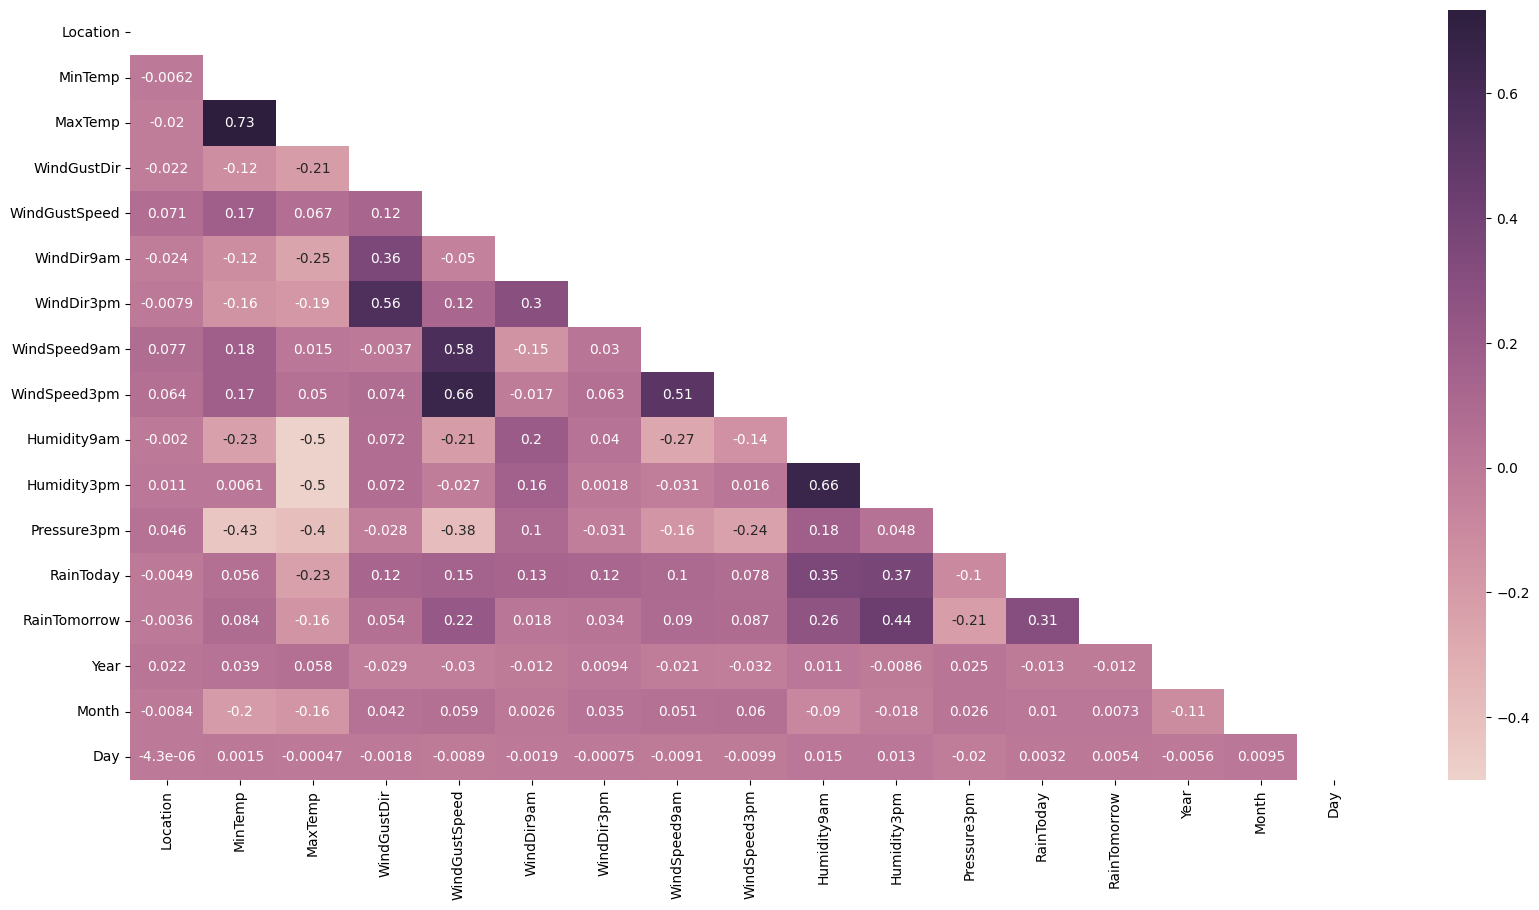

In [112]:
plt.figure(figsize=(20, 10))
mask = np.triu(np.ones_like(df.corr(), dtype=bool))
sns.heatmap(df.corr(), annot= True , cbar=True, cmap=sns.cubehelix_palette(as_cmap=True), mask=mask)
plt.show()

In [76]:
df=df.drop(columns=['Temp9am','Temp3pm','Pressure9am'],axis=1)

In [77]:
numcol_del=['temp9am','temp3pm','pressure9am']
numeric_columns = list(set(numeric_columns) - set(numcol_del))
numeric_columns

['WindSpeed9am',
 'Temp9am',
 'Day',
 'Temp3pm',
 'Pressure9am',
 'RainTomorrow',
 'WindSpeed3pm',
 'MinTemp',
 'Humidity9am',
 'RainToday',
 'Year',
 'MaxTemp',
 'Month',
 'WindGustSpeed',
 'Humidity3pm',
 'Pressure3pm']

In [78]:
df.describe()

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Year,Month,Day
count,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000,142193.000000
mean,23.740655,12.185565,23.225365,8.255885,39.920123,7.915755,7.974471,13.992489,18.644279,68.858235,51.495742,1015.252481,0.221213,0.224181,2012.758926,6.402544,15.715084
std,14.237503,6.388936,7.109617,4.953096,13.140632,4.911307,4.731493,8.851614,8.721688,18.932512,20.532227,6.681810,0.415065,0.417043,2.541256,3.426506,8.798150
min,0.000000,-8.500000,-4.800000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,977.100000,0.000000,0.000000,2007.000000,1.000000,1.000000
25%,11.000000,7.600000,17.900000,4.000000,31.000000,3.000000,4.000000,7.000000,13.000000,57.000000,37.000000,1011.000000,0.000000,0.000000,2011.000000,3.000000,8.000000
50%,24.000000,12.000000,22.600000,9.000000,39.000000,8.000000,8.000000,13.000000,19.000000,70.000000,52.000000,1015.200000,0.000000,0.000000,2013.000000,6.000000,16.000000
75%,36.000000,16.800000,28.200000,13.000000,46.000000,12.000000,12.000000,19.000000,24.000000,83.000000,65.000000,1019.400000,0.000000,0.000000,2015.000000,9.000000,23.000000
max,48.000000,33.900000,48.100000,16.000000,135.000000,16.000000,16.000000,130.000000,87.000000,100.000000,100.000000,1039.600000,1.000000,1.000000,2017.000000,12.000000,31.000000


In [80]:
df.head(10)

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,RainTomorrow,Year,Month,Day
0,2,13.4,22.9,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.1,0.0,0.0,2008,12,1
1,2,7.4,25.1,14,44.0,6,15,4.0,22.0,44.0,25.0,1007.8,0.0,0.0,2008,12,2
2,2,12.9,25.7,15,46.0,13,15,19.0,26.0,38.0,30.0,1008.7,0.0,0.0,2008,12,3
3,2,9.2,28.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1012.8,0.0,0.0,2008,12,4
4,2,17.5,32.3,13,41.0,1,7,7.0,20.0,82.0,33.0,1006.0,0.0,0.0,2008,12,5
5,2,14.6,29.7,14,56.0,13,13,19.0,24.0,55.0,23.0,1005.4,0.0,0.0,2008,12,6
6,2,14.3,25.0,13,50.0,12,13,20.0,24.0,49.0,19.0,1008.2,0.0,0.0,2008,12,7
7,2,7.7,26.7,13,35.0,10,13,6.0,17.0,48.0,19.0,1010.1,0.0,0.0,2008,12,8
8,2,9.7,31.9,6,80.0,9,7,7.0,28.0,42.0,9.0,1003.6,0.0,1.0,2008,12,9
9,2,13.1,30.1,13,28.0,8,10,15.0,11.0,58.0,27.0,1005.7,1.0,0.0,2008,12,10


# **2) Зниження розмірності і візуалізація даних. Застосуйте методи зниження розмірності sklearn.decomposition.PCA і sklearn.manifold.TSNE для візуалізації даних, з якими ви працювали в лабораторній № 1 (знижуючи розмірність до двох). Візуалізуйте результат.**

In [95]:
X = df.drop(columns=['RainTomorrow',], axis=1)
y = df['RainTomorrow']

In [96]:
scalar = StandardScaler()
X_scaled = pd.DataFrame(scalar.fit_transform(X), columns=X.columns)
X_scaled.head(10)

,Location,MinTemp,MaxTemp,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure3pm,RainToday,Year,Month,Day
0,-1.527004,0.190085,-0.045764,0.957812,0.310479,1.035216,1.273499,0.678693,0.614071,0.113127,-1.436563,-1.220105,-0.532962,-1.872674,1.633581,-1.672526
1,-1.527004,-0.749042,0.263677,1.159706,0.310479,-0.390072,1.484849,-1.128893,0.384757,-1.312997,-1.290451,-1.115343,-0.532962,-1.872674,1.633581,-1.558865
2,-1.527004,0.111824,0.348070,1.361601,0.462679,1.035216,1.484849,0.565719,0.843386,-1.629913,-1.046931,-0.980648,-0.532962,-1.872674,1.633581,-1.445205
3,-1.527004,-0.467304,0.671577,-0.859240,-1.211523,0.220766,-1.685409,-0.338074,-1.105785,-1.260177,-1.728788,-0.367040,-0.532962,-1.872674,1.633581,-1.331544
4,-1.527004,0.831821,1.276393,0.957812,0.082179,-1.408134,-0.205955,-0.789970,0.155443,0.694140,-0.900818,-1.384732,-0.532962,-1.872674,1.633581,-1.217883
5,-1.527004,0.377910,0.910690,1.159706,1.223680,1.035216,1.062148,0.565719,0.614071,-0.731983,-1.387859,-1.474528,-0.532962,-1.872674,1.633581,-1.104223
6,-1.527004,0.330954,0.249611,0.957812,0.767080,0.831603,1.062148,0.678693,0.614071,-1.048900,-1.582676,-1.055478,-0.532962,-1.872674,1.633581,-0.990562
7,-1.527004,-0.702086,0.488725,0.957812,-0.374422,0.424378,1.062148,-0.902945,-0.188528,-1.101719,-1.582676,-0.771123,-0.532962,-1.872674,1.633581,-0.876902
8,-1.527004,-0.389043,1.220131,-0.455451,3.050083,0.220766,-0.205955,-0.789970,1.072700,-1.418635,-2.069717,-1.743917,-0.532962,-1.872674,1.633581,-0.763241
9,-1.527004,0.143128,0.966952,0.957812,-0.907123,0.017153,0.428097,0.113823,-0.876471,-0.573525,-1.193043,-1.429630,1.876305,-1.872674,1.633581,-0.649580


In [97]:
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

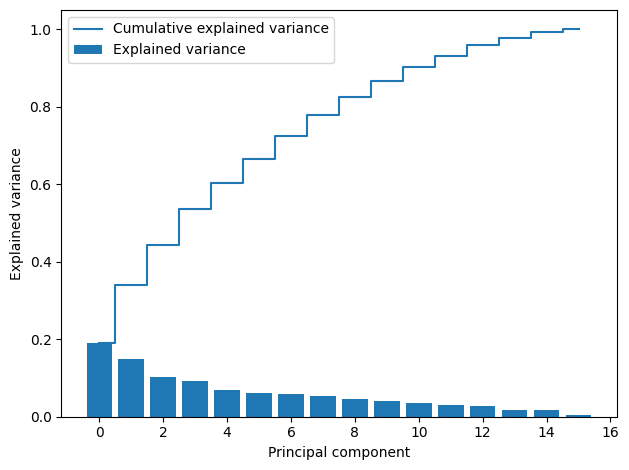

<Figure size 2000x1000 with 0 Axes>

In [103]:
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, align='center', label='Explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance')
plt.xlabel('Principal component')
plt.legend(loc='best')
plt.tight_layout()
plt.figure(figsize=(20, 10))
plt.show()

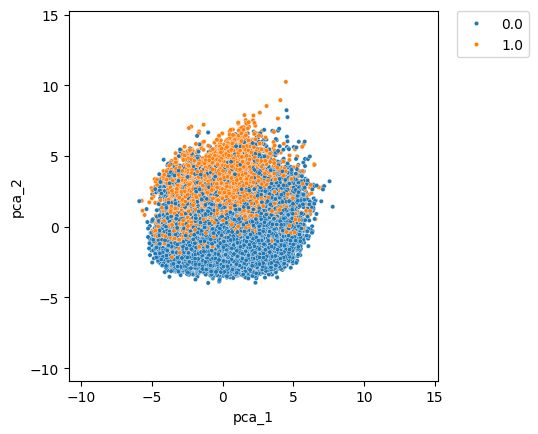

In [106]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X_scaled)

pca_result_df = pd.DataFrame({'pca_1': pca_result[:,0], 'pca_2': pca_result[:,1], 'label': y})

fig, ax = plt.subplots(1)
sns.scatterplot(x='pca_1', y='pca_2', hue='label', data=pca_result_df, ax=ax,s=10)
lim = (pca_result.min()-5, pca_result.max()+5)
ax.set_xlim(lim)
ax.set_ylim(lim)
ax.set_aspect('equal')
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)

In [117]:
!pip install umap-learn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.8/88.8 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.9/56.9 kB 2.8 MB/s eta 0:00:00


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


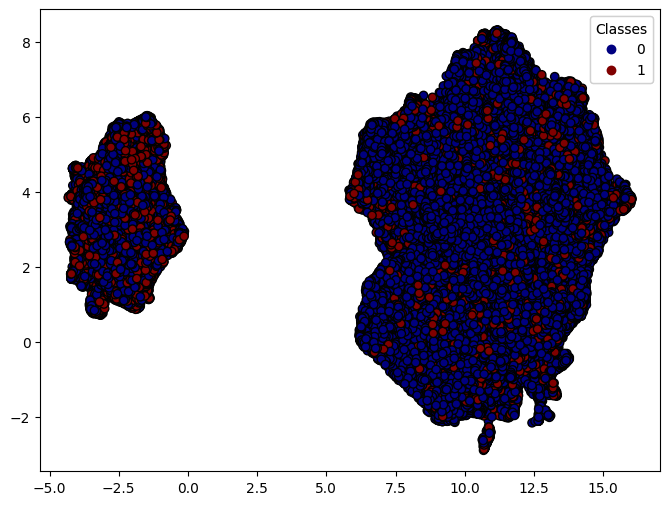

In [118]:
import umap
umap_model = umap.UMAP(n_components=2, random_state=0)
X_umap = umap_model.fit_transform(X_scaled)

# Визуализация с UMAP
fig, ax = plt.subplots(figsize=(8, 6))
scatter = ax.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='jet', edgecolor='k')
legend = ax.legend(*scatter.legend_elements(), loc="upper right", title="Classes")
ax.add_artist(legend)

# **3) Кластерний аналіз. За допомогою алгоритму k-means зробіть квантування зображення (видалення візуально надлишкової інформації) з глибиною 64, 32, 16 та 8 рівнів для будь-якого обраного самостійно зображення.**

In [134]:
def recreate_image(codebook, labels, w, h):
    """Recreate the (compressed) image from the code book & labels"""
    return codebook[labels].reshape(w, h, -1)

In [135]:
image = Image.open('/content/drive/MyDrive/Data Analyzis/image_0.jpg')
image_data_scaled = np.array(image, dtype=np.float64) / 255

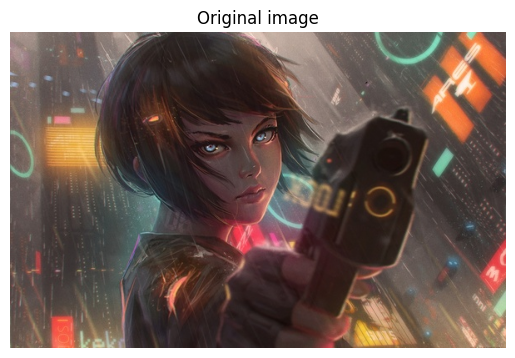

In [136]:
plt.clf()
plt.axis('off')
plt.title('Original image')
plt.imshow(image_data_scaled)

In [137]:
w, h, d = original_shape = tuple(image_data_scaled.shape)
assert d == 3
image_array = np.reshape(image_data_scaled, (w * h, d))

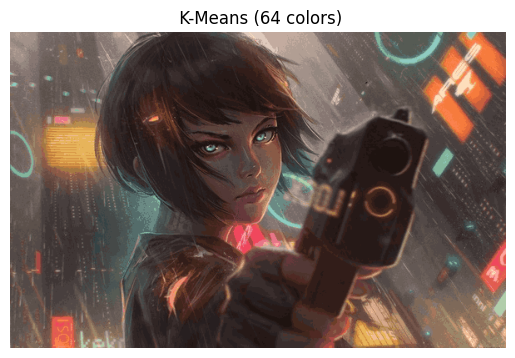

In [144]:
n_colors = 64

image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.clf()
plt.axis('off')
plt.title(f' K-Means ({n_colors} colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

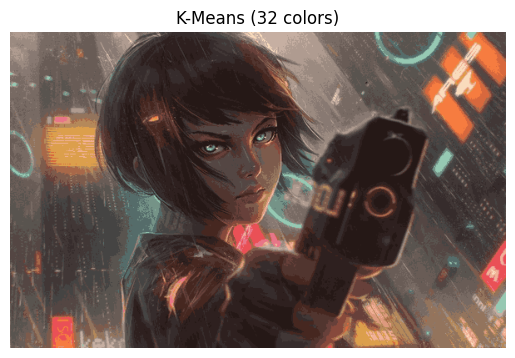

In [145]:
n_colors = 32

image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.clf()
plt.axis('off')
plt.title(f'K-Means ({n_colors} colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

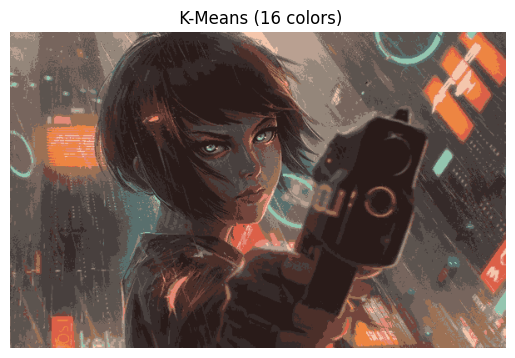

In [146]:
n_colors = 16

image_array_sample = shuffle(image_array, random_state=0, n_samples=1000)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.clf()
plt.axis('off')
plt.title(f' K-Means ({n_colors} colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

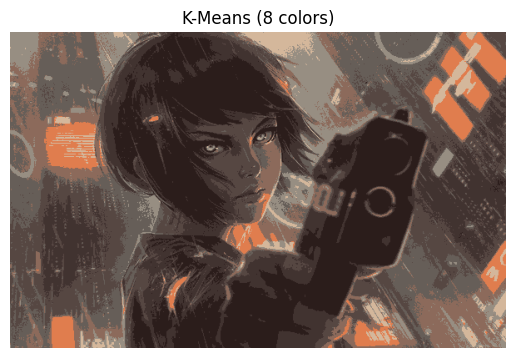

In [147]:
n_colors = 8

image_array_sample = shuffle(image_array, random_state=0)
kmeans = KMeans(n_clusters=n_colors, random_state=0).fit(image_array_sample)
labels = kmeans.predict(image_array)

plt.clf()
plt.axis('off')
plt.title(f'K-Means ({n_colors} colors)')
plt.imshow(recreate_image(kmeans.cluster_centers_, labels, w, h))

# **4) Обробка та класифікація текстових даних. Завантажте набір текстових даних (з мітками класів). Проведіть передобробку даних (видаліть стоп-слова, пунктуацію), за допомогою wordcloud зробіть візуалізацію найбільш поширених слів або n-gram у кожному класі. Векторизуйте тексти (наприклад за допомогою sklearn.feature_extraction.text.TfidfVectorizer). Проведіть класифікацію текстових даних, зробіть оцінку якості.**

In [148]:
api = KaggleApi()
api.authenticate()
api.dataset_download_files('tapakah68/email-spam-classification', 'Email Spam Text Classification Dataset')

Dataset URL: https://www.kaggle.com/datasets/tapakah68/email-spam-classification


In [149]:
import zipfile
path_to_zip_file = '/content/Email Spam Text Classification Dataset/email-spam-classification.zip'
with zipfile.ZipFile(path_to_zip_file, 'r') as z:
    z.extractall('Email Spam Text Classification Dataset')

In [151]:
df = pd.read_csv('/content/Email Spam Text Classification Dataset/email_spam.csv')
df

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam
...,...,...,...
79,Your application for the position of Child Pr...,"Dear Maryam, \n\n \n\nI would like to thank yo...",not spam
80,Your Kilimall Account is Ready - Shopping Now!,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...",not spam
81,Your Steam account: Access from new web or mob...,"Dear vladis163rus,\nHere is the Steam Guard co...",not spam
82,Your uploaded document is rejected,View In Browser | Log in\n \n \n\nSkrill logo\...,not spam


In [155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   84 non-null     object
 1   text    84 non-null     object
 2   type    84 non-null     object
dtypes: object(3)
memory usage: 2.1+ KB


In [165]:
df.isnull().sum()

,0
title,0
text,0
type,0
cleaned_text,0


In [166]:
df.shape

(84, 4)

In [190]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

df['cleaned_text'] = df['text'].apply(clean_text)
df[['text', 'cleaned_text']].head(10)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,text,cleaned_text
0,"Hi James,\n\nHave you claim your complimentary...",hi james claim complimentary gift yet ive comp...
1,"\nalt_text\nCongratulations, you just earned\n...",alttext congratulations earned 500 completed f...
2,"Here's your GitHub launch code, @Mortyj420!\n ...",heres github launch code mortyj420 octocat sta...
3,"Hello,\n \nThank you for contacting the Virtua...",hello thank contacting virtual reward center v...
4,"Hey Prachanda Rawal,\n\nToday's newsletter is ...",hey prachanda rawal todays newsletter jampacke...
5,Model Casting Call\nThank you for taking the t...,model casting call thank taking time register ...
6,Model Casting Call\nThank you for taking the t...,model casting call thank taking time register ...
7,Today more than ever you need to upskill and r...,today ever need upskill reskill global job mar...
8,"\nLogo Image\nSenol Yildirim,\n\nSomeone signe...",logo image senol yildirim someone signedin acc...
9,"Hi,\n\n \n\nThank you for your interest in joi...",hi thank interest joining appen email official...


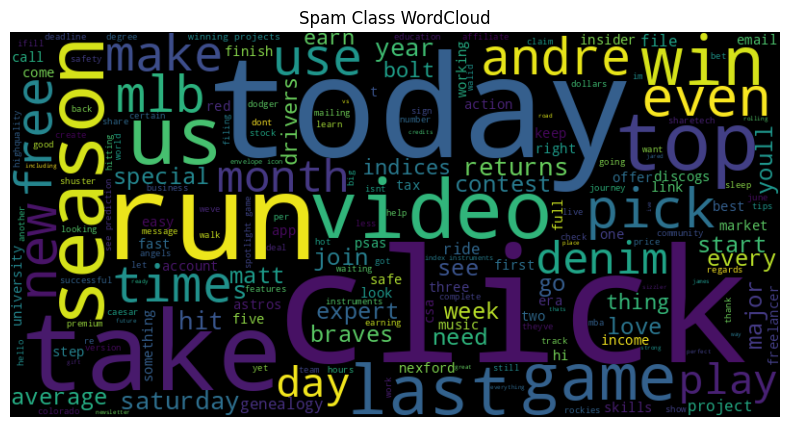

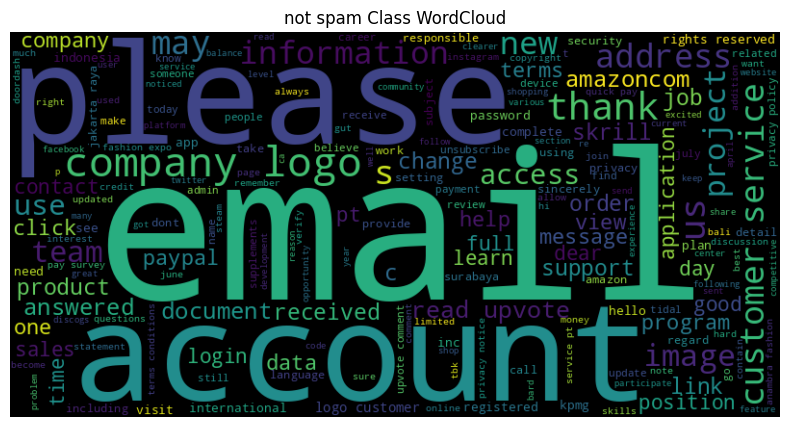

In [191]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

spam_text = ' '.join(df[df['type'] == 'spam']['cleaned_text'])
ham_text = ' '.join(df[df['type'] == 'not spam']['cleaned_text'])

plot_wordcloud(spam_text, 'Spam Class WordCloud')
plot_wordcloud(ham_text, 'not spam Class WordCloud')


In [192]:
vectorizer = TfidfVectorizer(max_features=1000)
X = vectorizer.fit_transform(df['cleaned_text'])

y = df['type'].apply(lambda x: 1 if x == 'spam' else 0)

In [193]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.65      1.00      0.79        11
           1       0.00      0.00      0.00         6

    accuracy                           0.65        17
   macro avg       0.32      0.50      0.39        17
weighted avg       0.42      0.65      0.51        17



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [194]:
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)

y_pred_nb = nb_model.predict(X_test)

print(classification_report(y_test, y_pred_nb))


              precision    recall  f1-score   support

           0       0.69      1.00      0.81        11
           1       1.00      0.17      0.29         6

    accuracy                           0.71        17
   macro avg       0.84      0.58      0.55        17
weighted avg       0.80      0.71      0.63        17



In [195]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)

print(classification_report(y_test, y_pred_rf))


              precision    recall  f1-score   support

           0       0.77      0.91      0.83        11
           1       0.75      0.50      0.60         6

    accuracy                           0.76        17
   macro avg       0.76      0.70      0.72        17
weighted avg       0.76      0.76      0.75        17

